Name: Zhuoyuan Xu (Kallen)

NetID: zx1137

# Derivation

**Problem 1**

In $J(w)$, as we discussed in the lecture, the 0-1 loss part
$$\begin{equation}
\Delta(y_i,y)=
  \begin{cases}
    1&\text{$y_i\neq y$}\\
    0&\text{$y_i=y$}
  \end{cases}
\end{equation}$$
and the margin
$$\begin{equation}
<w,(\Psi(x_i,y)-\Psi(x_i,y_i))>
  \begin{cases}
    <0&\text{if $y_i\neq y$}\\
    =0&\text{if $y_i=y$}
  \end{cases}
\end{equation}$$

Moreover, the part $\Delta(y_i,y)+<w,(\Psi(x_i,y)-\Psi(x_i,y_i))>$ is an affine function of w, and therefore it is a convex function with minimum value at 0. 

From the Convex Optimization notes, $(x_1, ..., x_n)\rightarrow max\{x_1, ..., x_n\}$ is convex on $R^n$. Therefore, $max_{y\in Y}(\Delta(y_i,y)+<w,(\Psi(x_i,y)-\Psi(x_i,y_i))>)$ is also convex.

Also, from the Convex Optimization notes, every norm $R^n$ is convex and $\lambda>0$, so $\lambda||w||^2$.

Meanwhile, the summation of these convex functions is also convex. Thus, the function $J(w)$ is a convex function of w.

**Problem 2**

Set $\hat{y_i}=argmax_{y\in Y}[\Delta(y_i,y)+<w,(\Psi(x_i,y)-\Psi(x_i,y_i))>]$.

In $J(w)$, set $f(w)=\lambda||w||^2$. This function is differentiable, and the derivative is $$\nabla f(w)=2\lambda w$$

Both $f(w)$ and the generalized hinge loss $l$ are convex functions. The addition of these convex functions have subgradient $$\partial J(w)=\partial f(w)+g_l$$

The hinge loss $l$ can also be written as
$$l=\frac{1}{n}\sum^n_{i=1}\max_{y\in Y}[0, 1+<w,(\Psi(x_i,y)-\Psi(x_i,y_i))>]$$

Since we have defined the $\hat{y_i}$, the subgradient of $J(w)$ can be written as
$$g_J=2\lambda w+\frac{1}{n}\sum^n_{i=1}[\Psi(x_i,\hat{y_i})-\Psi(x_i,y_i)]$$

**Problem 3**

For the stochastic gradient descent, the subgradient of $l$ at point $(x_i, y_i)$ is
$$\begin{equation}
  g_{l_i}=\begin{cases}
    \Psi(x_i,y)-\Psi(x_i,y_i), & \text{if $(<w,(\Psi(x_i,y)-\Psi(x_i,y_i))>)>1$}\\
    0, & \text{if $(<w,(\Psi(x_i,y)-\Psi(x_i,y_i))>)\leq1$}
  \end{cases}
\end{equation}$$

Thus the subgradient of $J(w)$ can be written as
$$\begin{equation}
  g_{J_i}=\begin{cases}
    2\lambda w+\Psi(x_i,y)-\Psi(x_i,y_i), & \text{if $(<w,(\Psi(x_i,y)-\Psi(x_i,y_i))>)>1$}\\
    2\lambda w, & \text{if $(<w,(\Psi(x_i,y)-\Psi(x_i,y_i))>)\leq1$}
  \end{cases}
\end{equation}$$

Since we have defined the $\hat{y_i}$, the subgradient of $J(w)$ can be written as
$$g_{J_i}=2\lambda w+(\Psi(x_i,\hat{y_i})-\Psi(x_i,y_i))$$

**Problem 4**

For the minibatch gradient descent, the subgradient based on the points $(x_i, y_i), ..., (x_{i+m-1},y_{i+m-1})$ can be written as
$$g_{J_{mini}}=2\lambda w+\frac{1}{m}\sum^{i+m-1}_{j=1}[\Psi(x_j,\hat{y_j})-\Psi(x_j,y_j)]$$

# Hinge Loss is a Special Case of Generalized Hinge Loss

Set $h(x, 1)=\frac{g(x)}{2}$ and $h(x, -1)=-\frac{g(x)}{2}$. We can write $h(x, y)$ as
$$h(x, y)=y\frac{g(x)}{2}$$

Given $Y\in\{-1,1\}$ and the hinge loss $$l(h,(x, y))=max_{y'\in Y}[\Delta(y,y')+(h(x,y')-h(x,y))]$$
When $y'=y$,
$$[\Delta(y,y')+(h(x,y')-h(x,y))]=0+0=0$$
When $y'=-y$,
$$[\Delta(y,y')+h(x,y')-h(x,y)]=1+(-y\frac{g(x)}{2}-y\frac{g(x)}{2})=1-yg(x)$$

Thus the hinge loss in this case can be written as $$l(h,(x, y))=max_{y'\in Y}[\Delta(y,y')+(h(x,y')-h(x,y))]=max_{y'\in Y}\{0, 1-yg(x)\}$$

# Implementation

**Problem 5**

In [25]:
import numpy as np
import matplotlib.pyplot as plt
try:
    from sklearn.datasets.samples_generator import make_blobs
except:
    from sklearn.datasets import make_blobs

%matplotlib inline

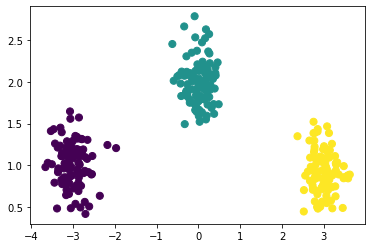

In [26]:
# Create the  training data
np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

In [27]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone

class OneVsAllClassifier(BaseEstimator, ClassifierMixin):  
    """
    One-vs-all classifier
    We assume that the classes will be the integers 0,..,(n_classes-1).
    We assume that the estimator provided to the class, after fitting, has a "decision_function" that 
    returns the score for the positive class.
    """
    def __init__(self, estimator, n_classes):      
        """
        Constructed with the number of classes and an estimator (e.g. an
        SVM estimator from sklearn)
        @param estimator : binary base classifier used
        @param n_classes : number of classes
        """
        self.n_classes = n_classes 
        self.estimators = [clone(estimator) for _ in range(n_classes)]
        self.fitted = False

    def fit(self, X, y=None):
        """
        This should fit one classifier for each class.
        self.estimators[i] should be fit on class i vs rest
        @param X: array-like, shape = [n_samples,n_features], input data
        @param y: array-like, shape = [n_samples,] class labels
        @return returns self
        """
        for i in range(self.n_classes):
            y_i = (1 * (y == i) + (-1) * (y != i)).astype(int)
            self.estimators[i].fit(X, y_i)
        
        self.fitted = True  
        return self   

    def decision_function(self, X):
        """
        Returns the score of each input for each class. Assumes
        that the given estimator also implements the decision_function method (which sklearn SVMs do), 
        and that fit has been called.
        @param X : array-like, shape = [n_samples, n_features] input data
        @return array-like, shape = [n_samples, n_classes]
        """
        if not self.fitted:
            raise RuntimeError("You must train classifer before predicting data.")

        if not hasattr(self.estimators[0], "decision_function"):
            raise AttributeError(
                "Base estimator doesn't have a decision_function attribute.")
        
        res = []
        for i in range(self.n_classes):
            res.append(self.estimators[i].decision_function(X))
        res = np.array(res).T
        return res
    
    def predict(self, X):
        """
        Predict the class with the highest score.
        @param X: array-like, shape = [n_samples,n_features] input data
        @returns array-like, shape = [n_samples,] the predicted classes for each input
        """
        d_func = self.decision_function(X)
        y = np.argmax(d_func, axis = 1)
        return y

**Problem 6**

Coeffs 0
[[-1.05853334 -0.90294603]]
Coeffs 1
[[0.42121645 0.27171776]]
Coeffs 2
[[ 0.89164752 -0.82601734]]


C:\Users\kalle\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([[100,   0,   0],
       [  0, 100,   0],
       [  0,  11,  89]], dtype=int64)

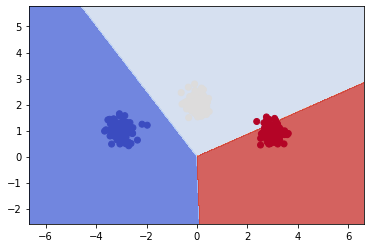

In [28]:
#Here we test the OneVsAllClassifier
from sklearn import svm
svm_estimator = svm.LinearSVC(loss='hinge', fit_intercept=False, C=200)
clf_onevsall = OneVsAllClassifier(svm_estimator, n_classes=3)
clf_onevsall.fit(X,y)

for i in range(3) :
    print("Coeffs %d"%i)
    print(clf_onevsall.estimators[i].coef_) #Will fail if you haven't implemented fit yet

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = clf_onevsall.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


from sklearn import metrics
metrics.confusion_matrix(y, clf_onevsall.predict(X))

The above error shows the classifier did not converge, so in the below code I try increasing the number of max_iter. Meanwhile, to perfectly seperate the data, in the below part of the code, I try to standardize the input data to further improve the performance of the classifier.

In [29]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_norm = scaler.fit_transform(X)

Coeffs 0
[[-10.80640377  -6.34770638]]
Coeffs 1
[[0.25636397 3.35636862]]
Coeffs 2
[[ 6.37272849 -3.64804078]]


C:\Users\kalle\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   0, 100]], dtype=int64)

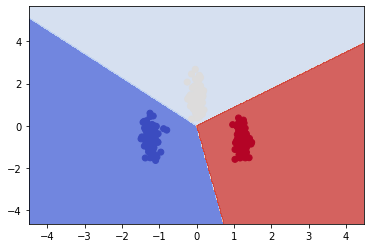

In [30]:
#Here we test the OneVsAllClassifier
from sklearn import svm
svm_estimator = svm.LinearSVC(loss='hinge', fit_intercept=False, C=200, max_iter=5000)
clf_onevsall = OneVsAllClassifier(svm_estimator, n_classes=3)
clf_onevsall.fit(X_norm,y)

for i in range(3) :
    print("Coeffs %d"%i)
    print(clf_onevsall.estimators[i].coef_) #Will fail if you haven't implemented fit yet

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X_norm[:,0])-3,max(X_norm[:,0])+3
y_min, y_max = min(X_norm[:,1])-3,max(X_norm[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = clf_onevsall.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap=plt.cm.coolwarm)


from sklearn import metrics
metrics.confusion_matrix(y, clf_onevsall.predict(X_norm))

We can see above that after standardizing the data, the classifier gives perfect separation. However, even if we increase the max_iter the error still shows. We may also try to continually adjust max_iter or even other hyperparameters such as C.

**Problem 7**

In [31]:
def zeroOne(y,a) :
    '''
    Computes the zero-one loss.
    @param y: output class
    @param a: predicted class
    @return 1 if different, 0 if same
    '''
    return int(y != a)

def featureMap(X,y,num_classes) :
    '''
    Computes the class-sensitive features.
    @param X: array-like, shape = [n_samples,n_inFeatures] or [n_inFeatures,], input features for input data
    @param y: a target class (in range 0,..,num_classes-1)
    @return array-like, shape = [n_samples,n_outFeatures], the class sensitive features for class y
    '''
    #The following line handles X being a 1d-array or a 2d-array
    num_samples, num_inFeatures = (1,X.shape[0]) if len(X.shape) == 1 else (X.shape[0],X.shape[1])
    res = []
    if num_samples == 1: #1d-array
        temp = np.hstack((np.zeros(num_inFeatures * y), X))
        temp = np.hstack((temp, np.zeros(num_inFeatures * (num_classes-1-y))))
        res.append(temp)
    else: #2d-array
        for i in range(num_samples):
            temp = np.hstack((np.zeros(num_inFeatures * y[i]), X[i]))
            temp = np.hstack((temp, np.zeros(num_inFeatures * (num_classes-1-y[i]))))
            res.append(temp)
    res = np.array(res)
    return res

**Problem 8**

In [32]:
def sgd(X, y, num_outFeatures, subgd, eta = 0.1, T = 10000):
    '''
    Runs subgradient descent, and outputs resulting parameter vector.
    @param X: array-like, shape = [n_samples,n_features], input training data 
    @param y: array-like, shape = [n_samples,], class labels
    @param num_outFeatures: number of class-sensitive features
    @param subgd: function taking x,y,w and giving subgradient of objective
    @param eta: learning rate for SGD
    @param T: maximum number of iterations
    @return: vector of weights
    '''
    num_samples = X.shape[0]
    w = np.zeros(num_outFeatures)
    ind = np.arange(num_samples)
    np.random.shuffle(ind)
    for i in range(T):
        if i >= num_samples:
            return w
        else:
            grad = subgd(X[ind[i]], y[ind[i]], w)
            w = np.subtract(w, eta * grad)
    return w

**Problem 9**

In [33]:
class MulticlassSVM(BaseEstimator, ClassifierMixin):
    '''
    Implements a Multiclass SVM estimator.
    '''
    def __init__(self, num_outFeatures, lam=1.0, num_classes=3, Delta=zeroOne, Psi=featureMap):       
        '''
        Creates a MulticlassSVM estimator.
        @param num_outFeatures: number of class-sensitive features produced by Psi
        @param lam: l2 regularization parameter
        @param num_classes: number of classes (assumed numbered 0,..,num_classes-1)
        @param Delta: class-sensitive loss function taking two arguments (i.e., target margin)
        @param Psi: class-sensitive feature map taking two arguments
        '''
        self.num_outFeatures = num_outFeatures
        self.lam = lam
        self.num_classes = num_classes
        self.Delta = Delta
        self.Psi = lambda X,y : Psi(X,y,num_classes)
        self.fitted = False
    
    def subgradient(self,x,y,w):
        '''
        Computes the subgradient at a given data point x,y
        @param x: sample input
        @param y: sample class
        @param w: parameter vector
        @return returns subgradient vector at given x,y,w
        '''
        psi = self.Psi(x, y)
        loss = np.zeros(self.num_classes)
        for i in range(self.num_classes):
            psi_i = self.Psi(x, i)
            loss[i] = self.Delta(y, i) + np.dot((psi - psi_i), w.T)
        y_hat = loss.tolist().index(np.max(loss)) # optimal y
        psi_y = self.Psi(x, y_hat)
        grad = 2 * self.lam * w + (psi_y-psi)
        return grad
        
    def fit(self,X,y,eta=0.1,T=10000):
        '''
        Fits multiclass SVM
        @param X: array-like, shape = [num_samples,num_inFeatures], input data
        @param y: array-like, shape = [num_samples,], input classes
        @param eta: learning rate for SGD
        @param T: maximum number of iterations
        @return returns self
        '''
        self.coef_ = sgd(X,y,self.num_outFeatures,self.subgradient,eta,T)
        self.fitted = True
        return self
    
    def decision_function(self, X):
        '''
        Returns the score on each input for each class. Assumes
        that fit has been called.
        @param X : array-like, shape = [n_samples, n_inFeatures]
        @return array-like, shape = [n_samples, n_classes] giving scores for each sample,class pairing
        '''
        if not self.fitted:
            raise RuntimeError("You must train classifer before predicting data.")
        d_func = []
        for i in range(X.shape[0]):
            temp = []
            for j in range(self.num_classes):
                temp.append(self.coef_@self.Psi(X[i], j).T)
            temp = np.array(temp)
            d_func.append(temp)
        d_func = np.array(d_func)
        return d_func
            
    def predict(self, X):
        '''
        Predict the class with the highest score.
        @param X: array-like, shape = [n_samples, n_inFeatures], input data to predict
        @return array-like, shape = [n_samples,], class labels predicted for each data point
        '''
        d_func = self.decision_function(X)
        y = []
        for i in range(d_func.shape[0]):
            y.append(d_func[i].tolist().index(np.max(d_func[i])))
        y = np.array(y)
        return y

**Problem 10**

w:
[[-1.00411099  0.03455183 -0.03833321  0.32648302  1.04244421 -0.36103486]]


array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   0, 100]], dtype=int64)

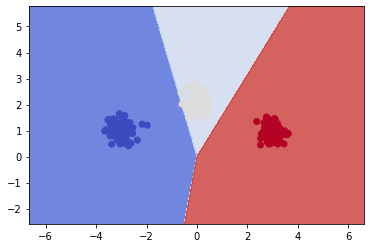

In [36]:
#the following code tests the MulticlassSVM and sgd
#will fail if MulticlassSVM is not implemented yet
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

est = MulticlassSVM(6,lam=1)
est.fit(X,y,eta=0.1)
print("w:")
print(est.coef_)
Z = est.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


from sklearn import metrics
metrics.confusion_matrix(y, est.predict(X))

To further improve the performance of the stochastic gradient descent, we can change some hyperparameters. For example, we can decrease the learning rate of the SGD, or even set learning rate to change with number of iterations. We can also reset the maximum number of iterations in the SGD algorithm, or we can change the lambda in the function as well. Also, SGD algorithm uses randomly chosen points for updates, and thus even though it is relatively fast, it can have worse performances than the batch gradient descent. We may want to run the algorithm many times to confirm our result.